In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
data = pd.read_csv('summary_results_r1.csv', index_col=0)


In [139]:
data

,scennumb,nsites_train,intra,select,regression,idtrain,idtest,hm,y_ref,y_pred,TP,TN,weights
0,1,1,1,1,0,1,1,1,0,0,0,1,0.703488
1,1,1,1,1,0,1,1,0,0,1,0,0,0.703488
2,1,1,1,1,0,1,1,1,1,1,1,0,0.703488
3,1,1,1,1,0,1,1,1,1,1,1,0,0.703488
4,1,1,1,1,0,1,1,0,0,1,0,0,0.703488
5,1,1,1,1,0,1,1,1,0,0,0,1,0.703488
6,1,1,1,1,0,1,1,0,0,1,0,0,0.703488
7,1,1,1,1,0,1,1,0,0,1,0,0,0.703488
8,1,1,1,1,0,1,1,0,0,1,0,0,0.703488
9,1,1,1,1,0,1,1,1,1,1,1,0,0.703488


In [221]:
def get_stats(stats, N=4, weighted=False):
    
    sensitivity = []
    specificity = []
    acc = []
    w = []
    for ss in range(N):
        stats_per_site = stats[stats['idtest']==ss+1]
        
        y_ref= stats_per_site.values[:,-5].astype(float)
        y_pred= stats_per_site.values[:,-4].astype(float)
        tp = stats_per_site.values[:,-3].astype(float)
        tn = stats_per_site.values[:,-2].astype(float)
        w.append(stats_per_site.values[:,-1].astype(float).mean())
        
        sensitivity.append(np.sum(tp) / np.sum(y_ref == 1))
        specificity.append(np.sum(tn) / np.sum(y_ref == 0))
        acc.append(np.mean(y_ref == y_pred))
        
    w = np.array(w)
    acc = np.array(acc)
    sensitivity = np.array(sensitivity)
    specificity = np.array(specificity)
    
    print stats.mean()['hm']
    
    if weighted:
        return [np.mean(w*acc), np.mean(w*sensitivity), np.mean(w*specificity)]
    else:
        return [np.mean(acc), np.mean(sensitivity), np.mean(specificity)]

In [254]:
testd = pd.read_csv('/home/cdansereau/data/schizo/results_svm4sites/Comb2_Allsubj1_Mcor0.csv',index_col=0)

testd['Acc'].mean()

0.62018917584925

In [265]:
testd = pd.read_csv('/home/cdansereau/data/schizo/results_svm4sites/Comb3_Allsubj1_Mcor0.csv',index_col=0)

print testd['Acc'].mean()
dd=[]
dd.append(testd[testd['Test']=='[1]']['Acc'].mean())
dd.append(testd[testd['Test']=='[2]']['Acc'].mean())
dd.append(testd[testd['Test']=='[3]']['Acc'].mean())
dd.append(testd[testd['Test']=='[4]']['Acc'].mean())
print dd
np.mean(dd)

0.664473374323
[0.7054263565889999, 0.5904761904763333, 0.705128205128, 0.6568627450979999]


0.66447337432283327

In [258]:
testd = pd.read_csv('/home/cdansereau/data/schizo/results_svm4sites/Comb4_Allsubj1_Mcor0.csv',index_col=0)

print testd['Acc'].mean()

testd

0.658615136574


,Train,Test,Acc,y_ref,y_pred
0,"[1, 2, 3]",[4],0.764706,[1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0...,[1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0...
1,"[1, 2, 4]",[3],0.673077,[1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1...,[0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1...
2,"[1, 3, 4]",[2],0.557143,[1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0...,[1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1...
3,"[2, 3, 4]",[1],0.639535,[1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1...,[1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1...


In [268]:
stats['hm'].mean()

0.6652892561983471

In [266]:
stats = data[(data['nsites_train']==2) & (data['intra']==0) & (data['regression']==0) & (data['select']==1)]

print 'acc',stats['hm'].mean()
stats

acc 0.665289256198


,scennumb,nsites_train,intra,select,regression,idtrain,idtest,hm,y_ref,y_pred,TP,TN,weights
2408,3,2,0,1,0,23,1,1,1,1,1,0,0.703488
2409,3,2,0,1,0,23,1,0,0,1,0,0,0.703488
2410,3,2,0,1,0,23,1,0,0,1,0,0,0.703488
2411,3,2,0,1,0,23,1,1,0,0,0,1,0.703488
2412,3,2,0,1,0,23,1,1,0,0,0,1,0.703488
2413,3,2,0,1,0,23,1,1,0,0,0,1,0.703488
2414,3,2,0,1,0,23,1,1,0,0,0,1,0.703488
2415,3,2,0,1,0,23,1,1,1,1,1,0,0.703488
2416,3,2,0,1,0,23,1,0,0,1,0,0,0.703488
2417,3,2,0,1,0,23,1,1,1,1,1,0,0.703488


In [219]:
def compile_scores(select=1):
    scores = []
    # ['idtest', 'idtrain', 'nsites_train', 'intra', 'regression', 'select']
    stats = data[(data['nsites_train']==1) & (data['intra']==1) & (data['regression']==1) & (data['select']==select)]
    scores.append(get_stats(stats))
    stats = data[(data['nsites_train']==2) & (data['intra']==1) & (data['regression']==1) & (data['select']==select)]
    scores.append(get_stats(stats))
    stats = data[(data['nsites_train']==3) & (data['intra']==1) & (data['regression']==1) & (data['select']==select)]
    scores.append(get_stats(stats))

    stats = data[(data['nsites_train']==1) & (data['intra']==0) & (data['regression']==1) & (data['select']==select)]
    scores.append(get_stats(stats))
    stats = data[(data['nsites_train']==2) & (data['intra']==0) & (data['regression']==1) & (data['select']==select)]
    scores.append(get_stats(stats))
    stats = data[(data['nsites_train']==3) & (data['intra']==0) & (data['regression']==1) & (data['select']==select)]
    scores.append(get_stats(stats))

    # no site regression
    stats = data[(data['nsites_train']==1) & (data['intra']==1) & (data['regression']==0) & (data['select']==select)]
    scores.append(get_stats(stats))
    stats = data[(data['nsites_train']==2) & (data['intra']==1) & (data['regression']==0) & (data['select']==select)]
    scores.append(get_stats(stats))
    stats = data[(data['nsites_train']==3) & (data['intra']==1) & (data['regression']==0) & (data['select']==select)]
    scores.append(get_stats(stats))

    stats = data[(data['nsites_train']==1) & (data['intra']==0) & (data['regression']==0) & (data['select']==select)]
    scores.append(get_stats(stats))
    stats = data[(data['nsites_train']==2) & (data['intra']==0) & (data['regression']==0) & (data['select']==select)]
    scores.append(get_stats(stats))
    stats = data[(data['nsites_train']==3) & (data['intra']==0) & (data['regression']==0) & (data['select']==select)]
    scores.append(get_stats(stats))

    scores = np.array(scores)
    return scores

In [308]:
def plot_bars(stats,yaxis_label='Classification accuracy',vmin=0.6,vmax=0.75):
#import seaborn as sns
#sns.set_context("poster")#talk
    

    plt.figure(figsize=(8, 3))
    new_style = {'grid': False}
    plt.rc('axes', **new_style)
    n_groups = 2
    
    means_intra = stats[:3]
    std_intra = (0, 0, 0)

    means_inter = stats[3:6]
    std_inter = (0, 0, 0)

    #fig, ax = plt.subplots()
    ax = plt.subplot(1,2,1)
    bar_width = 0.25
    opacity = 0.8
    error_config = {'ecolor': '0.3'}

    index = np.arange(0,0.75,bar_width)
    rects1 = plt.bar(index, means_intra, bar_width,
                     alpha=opacity,
                     color='#0062af',
                     edgecolor='#ffffff',
                     #yerr=std_intra,
                     #error_kw=error_config,
                     label='Intra-site test')

    index = np.arange(0.75,1.50,bar_width)
    rects2 = plt.bar(index + bar_width, means_inter, bar_width,
                     alpha=opacity,
                     color='#fdcc61',
                     edgecolor='#ffffff',
                     hatch="",
                     #yerr=std_inter,
                     #error_kw=error_config,
                     label='Inter-site test')


    plt.xlabel('# of site used for trainning')
    plt.ylabel(yaxis_label)
    plt.title('Site regression')
    #plt.xticks(index + bar_width + bar_width/2., ('Intra-site test', 'Inter-site test'))
    plt.xticks(np.hstack([np.arange(0.25/2.,0.75,bar_width),np.arange(1.+.25/2.,1.75,bar_width)]), ('1', '2', '3','1', '2', '3'))

    #plt.legend()
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
    plt.ylim((vmin,vmax))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax = plt.subplot(1,2,2)

    means_intra = stats[6:9]
    std_intra = (0,0,0)

    means_inter = stats[9:12]
    std_inter = (0,0,0)

    #fig, ax = plt.subplots()
    ax = plt.subplot(1,2,2)

    index = np.arange(0,0.75,bar_width)
    rects1 = plt.bar(index, means_intra, bar_width,
                     alpha=opacity,
                     color='#0062af',
                     edgecolor='#ffffff',
                     #yerr=std_intra,
                     #error_kw=error_config,
                     label='Intra-site test')

    index = np.arange(0.75,1.50,bar_width)
    rects2 = plt.bar(index + bar_width, means_inter, bar_width,
                     alpha=opacity,
                     color='#fdcc61',
                     edgecolor='#ffffff',
                     hatch="",
                     #yerr=std_inter,
                     #error_kw=error_config,
                     label='Inter-site test')


    plt.xlabel('# of site used for trainning')
    #plt.ylabel('Classification accuracy')
    plt.title('No site regression')
    #plt.xticks(index + bar_width + bar_width/2., ('Intra-site test', 'Inter-site test'))
    plt.xticks(np.hstack([np.arange(0.25/2.,0.75,bar_width),np.arange(1.+.25/2.,1.75,bar_width)]), ('1', '2', '3','1', '2', '3'))

    #plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
    plt.ylim((vmin,vmax))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    #plt.tight_layout()
    #plt.show()

In [323]:
def plot_bars_sens_spec(stats,yaxis_label=['Classification accuracy'],vmin=0.5,vmax=0.85):
#import seaborn as sns
#sns.set_context("poster")#talk
    n_sub_var = stats.shape[1]

    plt.figure(figsize=(8, 3))
    new_style = {'grid': False}
    plt.rc('axes', **new_style)
    n_groups = 2
    for ii in range(n_sub_var):
        means_intra = stats[:3,ii]
        std_intra = (0, 0, 0)

        means_inter = stats[3:6,ii]
        std_inter = (0, 0, 0)

        #fig, ax = plt.subplots()
        ax = plt.subplot(1,2,1)
        bar_width = 0.25
        opacity = 0.8
        error_config = {'ecolor': '0.3'}

        if ii == 0:
            hatch = '////'
        else:
            hatch =''
            
        index = np.arange(0,0.75,bar_width)+ii*bar_width/2
        rects1 = plt.bar(index, means_intra, bar_width/2,
                         alpha=opacity,
                         color='#0062af',
                         edgecolor='#ffffff',
                         hatch=hatch,
                         #yerr=std_intra,
                         #error_kw=error_config,
                         label='Intra-site test')

        index = np.arange(0.75,1.50,bar_width)+ii*bar_width/2
        rects2 = plt.bar(index + bar_width, means_inter, bar_width/2,
                         alpha=opacity,
                         color='#fdcc61',
                         edgecolor='#ffffff',
                         hatch=hatch,
                         #yerr=std_inter,
                         #error_kw=error_config,
                         label='Inter-site test')


    plt.xlabel('# of site used for trainning')
    plt.ylabel('Sensitivity / Specificity')
    plt.title('Site regression')
    #plt.xticks(index + bar_width + bar_width/2., ('Intra-site test', 'Inter-site test'))
    plt.xticks(np.hstack([np.arange(0.25/2.,0.75,bar_width),np.arange(1.+.25/2.,1.75,bar_width)]), ('1', '2', '3','1', '2', '3'))
        
    for ii in range(n_sub_var):
        #plt.legend()
        #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
        plt.ylim((vmin,vmax))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')

        ax = plt.subplot(1,2,2)

        means_intra = stats[6:9,ii]
        std_intra = (0,0,0)

        means_inter = stats[9:12,ii]
        std_inter = (0,0,0)

        #fig, ax = plt.subplots()
        ax = plt.subplot(1,2,2)
        
        label_intra = 'Intra-site test ' + yaxis_label[ii]
        label_inter = 'Inter-site test ' + yaxis_label[ii]
        
        if ii == 0:
            hatch = '////'
        else:
            hatch =''
        
        index = np.arange(0,0.75,bar_width)+ii*bar_width/2
        rects1 = plt.bar(index, means_intra, bar_width/2,
                         alpha=opacity,
                         color='#0062af',
                         edgecolor='#ffffff',
                         hatch=hatch,
                         #yerr=std_intra,
                         #error_kw=error_config,
                         label=label_intra)

        index = np.arange(0.75,1.50,bar_width)+ii*bar_width/2
        rects2 = plt.bar(index + bar_width, means_inter, bar_width/2,
                         alpha=opacity,
                         color='#fdcc61',
                         edgecolor='#ffffff',
                         hatch=hatch,
                         #yerr=std_inter,
                         #error_kw=error_config,
                         label=label_inter)


    plt.xlabel('# of site used for trainning')
    #plt.ylabel('Classification accuracy')
    plt.title('No site regression')
    #plt.xticks(index + bar_width + bar_width/2., ('Intra-site test', 'Inter-site test'))
    plt.xticks(np.hstack([np.arange(0.25/2.,0.75,bar_width),np.arange(1.+.25/2.,1.75,bar_width)]), ('1', '2', '3','1', '2', '3'))

    #plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
    plt.ylim((vmin,vmax))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    #plt.tight_layout()
    #plt.show()
    


0.698347107438
0.699724517906
0.692671394799
0.632231404959
0.674931129477
0.685950413223
0.681818181818
0.67217630854
0.684397163121
0.633608815427
0.665289256198
0.640495867769


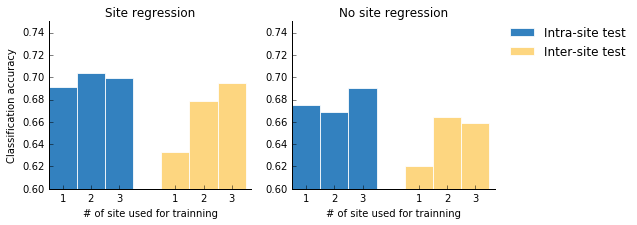

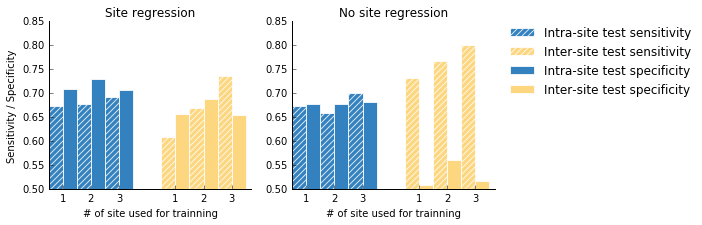

In [324]:
scores = compile_scores(select=1)
plot_bars(scores[:,0])
plt.savefig('samples/scores_select1_acc.png', dpi = 300, bbox_inches='tight')
plot_bars_sens_spec(scores[:,[1,2]], ['sensitivity','specificity'])
plt.savefig('samples/scores_select1_ss.png', dpi = 300, bbox_inches='tight')

0.698347107438
0.727272727273
0.750688705234
0.632231404959
0.683195592287
0.706611570248
0.681818181818
0.709366391185
0.730027548209
0.633608815427
0.651515151515
0.690082644628


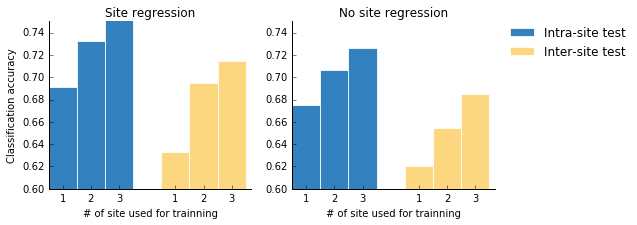

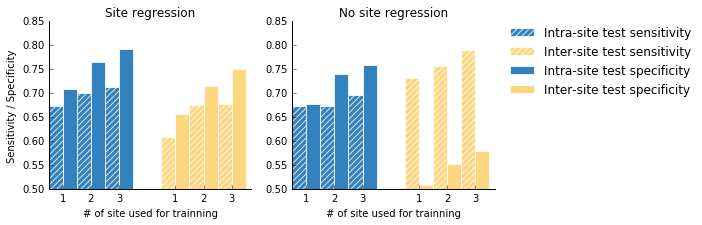

In [325]:
scores = compile_scores(select=0)
plot_bars(scores[:,0])
plt.savefig('samples/scores_select0_acc.png', dpi = 300, bbox_inches='tight')
plot_bars_sens_spec(scores[:,[1,2]], ['sensitivity','specificity'])
plt.savefig('samples/scores_select0_ss.png', dpi = 300, bbox_inches='tight')